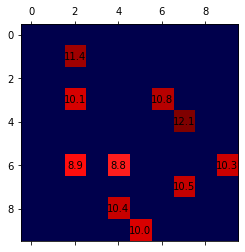

In [79]:
from numpy import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import shift

random.seed(10)

# Map creation ----------------------------------------------------------------
nest_location = (0, 0)
grid_shape = (10, 10)

# Parameters for map
resource_frequency = 0.2
volume_mean = 10
volume_sd = 3

class ResourcePoint:
    def __init__(self, x, y, volume):
        self.x = x
        self.y = y
        self.volume = volume
    
    def __str__(self):
        string = "({}, {}) - {}".format(self.x, self.y, self.volume)
        return string
    
class SeaMap:
    def __init__(self, shape, frequency, volume_mean, volume_sd, nest):
        self.shape = shape
        self.frequency = frequency 
        self.volume_mean = volume_mean
        self.volume_sd = volume_sd
        self.nest = nest

        self.map = np.zeros(shape)
        self.resource_points = []

    # Generate resource point (point = uniform() : volume = normal())
    def __gen_resource_point(self, x, y):
        if random.uniform(0, 1) < self.frequency and (x != self.nest[0] and y != self.nest[1]):
            volume = max(0, random.normal(loc=self.volume_mean, scale=self.volume_sd))
            self.map[x][y] = volume
            self.resource_points.append(ResourcePoint(y, x, volume))
        else:
            self.map[x][y] = 0

    # Fill initial points
    def gen_map(self):        
        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                self.__gen_resource_point(i, j)

    def shift_map(self, shiftx, shifty):
        self.map = shift(self.map, (shiftx, shifty), cval=np.nan)

        nans = np.argwhere(np.isnan(self.map))

        for coord in nans:
            self.__gen_resource_point(coord[0], coord[1])

    def show_map(self):
        fig, ax = plt.subplots()
        # Using matshow here just because it sets the ticks up nicely. imshow is faster.
        ax.matshow(self.map, cmap="seismic")

        for (i, j), z in np.ndenumerate(self.map):
            if z > 1e-10:
                ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

        plt.show()

seamap = SeaMap(
    shape=(10, 10), 
    frequency=0.1,
    volume_mean=10,
    volume_sd=1,
    nest=(0,0)
)

seamap.gen_map()
seamap.show_map()

# Arrivals --------------------------------------------------------------------


# Main loop -------------------------------------------------------------------



In [80]:
# Event
import heapq as hq

class Event:
    ARRIVAL = 0
    MAP = 1

    def __init__(self, id, type, time):
        self.id = id
        self.type = type
        self.time = time

    def __lt__(self, other):
        return (self.time < other.time)

event_list = []

    

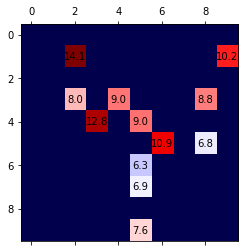

[1.         0.23762376 0.92079208 0.8019802  0.32673267 0.8019802
 0.64356436 0.44554455 0.16831683 0.44554455 0.31683168 0.        ]
[1.         0.49345318 0.21624246 0.34038576 0.3228077  0.83393432
 0.34226225 0.59314113 0.06140158 0.         0.0703203  0.16551016]
[1.         0.36553847 0.56851727 0.57118298 0.32477019 0.81795726
 0.4929133  0.51934284 0.1148592  0.22277228 0.19357599 0.08275508]
[ 0  5  3  2  7  6  1  4  9 10  8 11]


In [101]:
# Main loop

class Sim:
    def __init__(self):
        # Parameters for map
        self.nest_location = np.array([0, 0])
        self.grid_shape = (10, 10)
        self.resource_frequency = 0.2
        self.volume_mean = 10
        self.volume_sd = 3

        self.seamap = SeaMap(
            shape = self.grid_shape, 
            frequency = self.resource_frequency,
            volume_mean = self.volume_mean,
            volume_sd = self.volume_sd,
            nest = self.nest_location
        )

        self.clock = 0
        self.event_list = []
        self.event_count = 0

    def initialize_sim(self):
        # Generate map
        self.seamap.gen_map()

        # Create first arrival
        arrival_event = Event(self.event_count, Event.ARRIVAL, self.clock + random.exponential(3))
        self.event_count += 1

        # Create first map event
        map_event = Event(self.event_count, Event.MAP, self.clock + 10)
        self.event_count += 1
    
    def __square_distance(self, point1, point2):
        return(
            np.power(point1[0]-point2[0], 2) +
            np.power(point1[1]-point2[1], 2)
        )

    def process_arrival(self):
        # Get all resource locations
        coords = np.transpose(np.nonzero(self.seamap.map))

        # Calc distance and get volumes
        distances = np.zeros(coords.shape[0])
        volumes = np.zeros(coords.shape[0])
        for i in range(coords.shape[0]):
            distances[i] = self.__square_distance(self.nest_location, coords[i])
            volumes[i] = self.seamap.map[coords[i][0]][coords[i][1]]

        # Normalize and combine to create rating
        distances = 1-(distances-np.min(distances))/(np.max(distances)-np.min(distances)) 
        volumes = (volumes-np.min(volumes))/(np.max(volumes)-np.min(volumes)) 

        ratings = (distances + volumes) / 2
        sort_ind = np.argsort(ratings)[::-1]

        # Get all high ratings based on an epsilon
        epsilon = 0.1
        cur_rating = ratings[sort_ind[0]]
        high_rated = []

        while(cur_rating >= ratings[sort_ind[0]] - epsilon):
            high_rated.append[]

    def run(self):
        self.initialize_sim()
        self.seamap.show_map()
        self.process_arrival()

random.seed(10)
sim = Sim()
sim.run()
        